In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor

2024-06-27 10:09:28.789901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [15]:
# Initialize SVM regressor
svm_model = SVR(kernel='rbf', C=10000, gamma='scale')

# Train the model
svm_model.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [5]:
res = svm_model.predict(X_test)
print(res)
print(res.shape)

[-2.95130264e+00  1.30946528e+02  3.36508918e+00  4.45245975e+01
  9.00844402e+00  7.21835240e+01  2.29448944e+01  9.16951096e+01
  1.18353938e+01  7.94061307e+00  3.47232131e+01  1.15130268e+02
  2.71871303e+00  1.17985715e+01  6.69892226e+00  9.59585197e+00
  4.48890674e+00  2.04328113e+00  7.46519459e+00  6.48986039e+01
  2.80544158e+01  4.23698718e+00  7.51164430e+00  3.79415752e+00
  1.65002743e+01  8.29577289e+00  2.59513702e+01  9.59604830e+00
  9.98146881e+01  1.39543806e+01  1.45330784e+01  6.63109249e+00
  2.51054489e+01  2.60221008e+01  3.71695136e+01  1.32238591e+01
  2.62370854e+01  9.07846864e+00  2.05695007e+01  1.39392123e+01
  9.26740897e+00  1.80211267e+01  7.31361762e+00  4.15135373e+00
  2.71376770e+00  1.00817483e+01  2.00647618e+01  1.33419968e+01
  4.31567634e+00  1.37734944e+00  2.31545989e+01  1.58002797e+01
  1.29111035e+02  7.35379823e+01  3.07884505e+01  1.58051269e+01
  2.52518359e+01  5.63290032e+00 -4.18659647e+00  1.41114157e+00
  4.80386933e+00  1.54619

In [6]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.7476649842287948


In [7]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

10.073810196933776


In [8]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.6626951652410407


In [9]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

30.721866936931058


In [10]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import matplotlib.pyplot as plt 

In [18]:
X_test_shap = shap.sample(X_test,nsamples = 2)
explainer = shap.KernelExplainer(svm_model.predict, data=X_test_shap)
shap_values = explainer.shap_values(X_test)



100%|██████████| 168/168 [01:21<00:00,  2.05it/s]


In [19]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


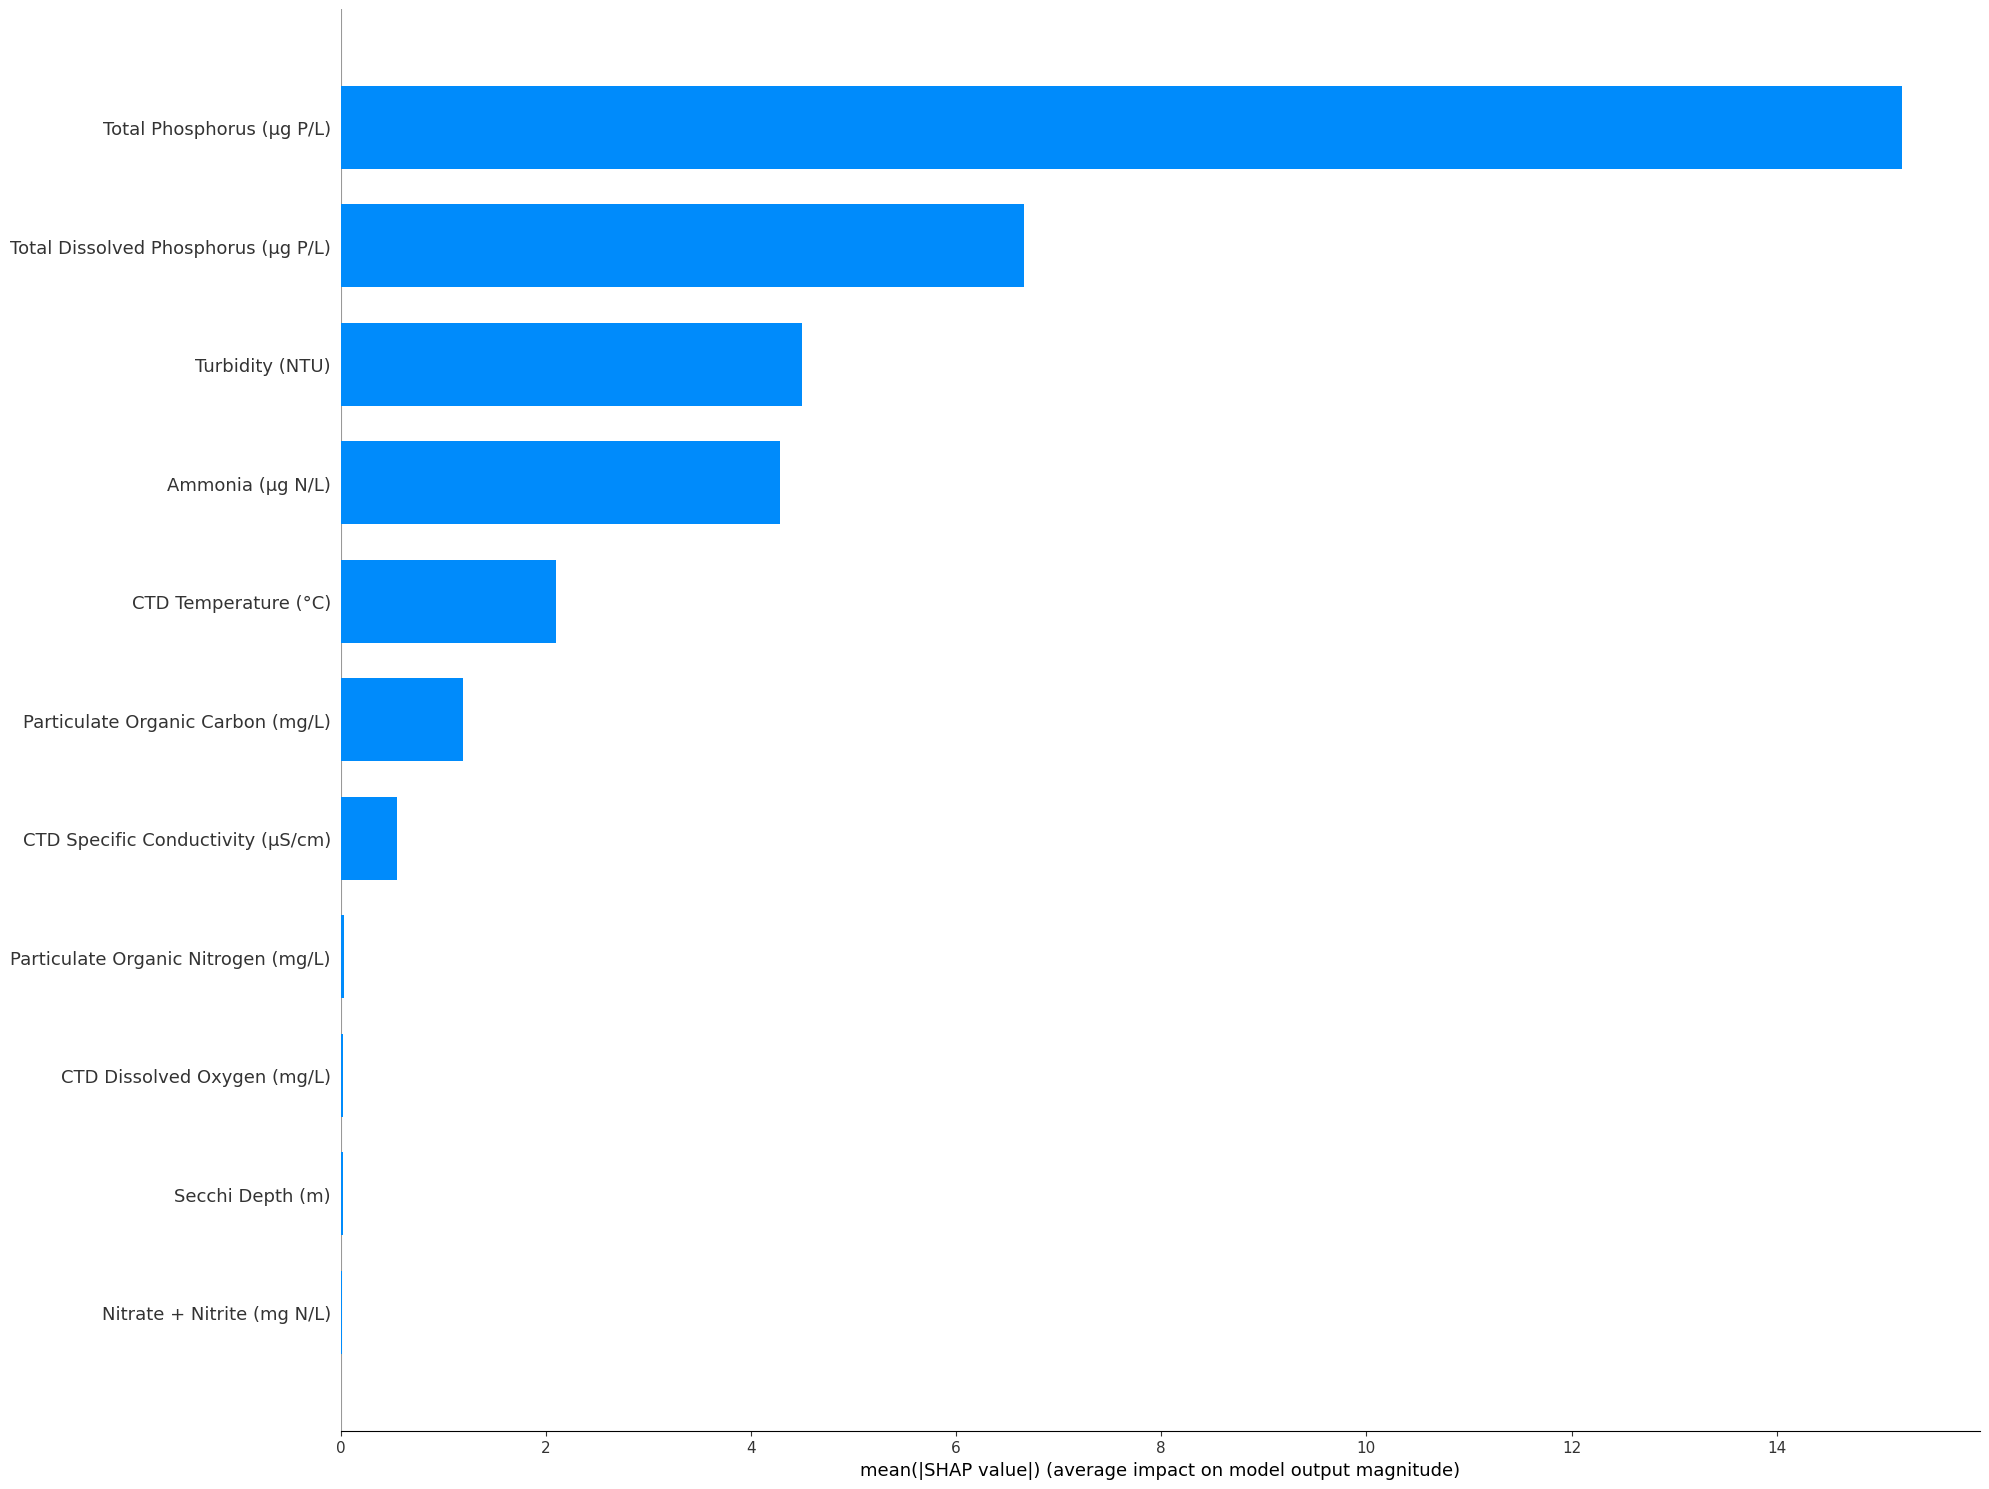

In [29]:
shap.summary_plot(shap_values,X_test_shap,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)